# 1. Preparación del dataset

In [ ]:
from google.colab import files
import pandas as pd

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Cargar el archivo CSV en un DataFrame
df_transformed = pd.read_csv('df_transformed.csv')

# Ver las primeras filas del DataFrame
print(df_transformed.head())


Saving df_transformed.csv to df_transformed (1).csv
   Total Waste_Bajo  Total Waste_Medio  Total Waste_Alto  Total Waste_Extremo  \
0                 0                  0                 0                    0   
1                 0                  0                 0                    0   
2                 0                  0                 0                    0   
3                 0                  0                 0                    0   
4                 0                  0                 0                    0   

   Economic Loss_Bajo  Economic Loss_Medio  Economic Loss_Alto  \
0                   0                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    0                   0   
4                   0                    0                   0   

   Economic Loss_Extremo  Avg Waste per Capita_Bajo  \
0        

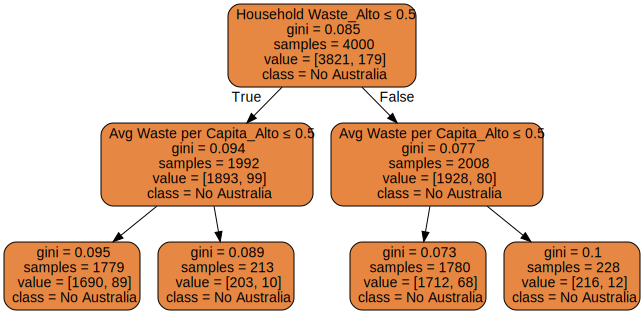

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

# Variables independientes (features)
selected_features = ['Avg Waste per Capita_Alto', 'Household Waste_Alto', 'Economic Loss_Extremo']

# Variable dependiente (objetivo)
target = 'Country_Australia'

# Separar X e y
X = df_transformed[selected_features]
y = df_transformed[target]

# Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Visualizar el árbol con Graphviz
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=selected_features,
    class_names=['No Australia', 'Australia'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_australia", format="png", cleanup=False)  # Guarda como PNG
graph  # Mostrar en notebook


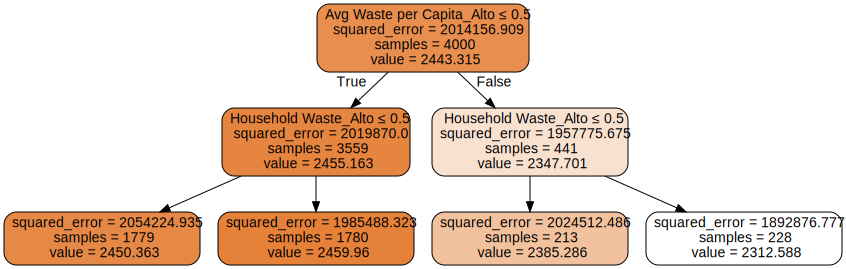

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

selected_features = [
    'Avg Waste per Capita_Alto',
    'Household Waste_Alto',
    'Economic Loss_Extremo'
]

target = 'Population_Label'

# Usar el DataFrame con el nombre correcto
X = df_transformed[selected_features]
y = df_transformed[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

dot_data = export_graphviz(
    regressor,
    out_file=None,
    feature_names=selected_features,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("regression_tree_population", format="png", cleanup=False)
graph
